# RCEW analysis

Plot of the peak SWE on March 14, 2006 with an inset showing the small headwaters catchment of Reynolds Mountain East.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import h5py
import numpy as np
import seaborn as sns

sns.set_context('paper')

In [71]:
# Read in the data
nc = h5py.File('../output/rcew/devel/wy2006/rcew_longterm_2006/runs/run0000_8759/snow.nc', 'r')
# swe = nc['specific_mass'][165,:] # March 14, 2006 as an index
swe = nc['specific_mass'][5,:]

topo = h5py.File('topo/topo.nc')
mask = topo['mask'][:]
rme_mask = topo['Reynolds Mountain East mask'][:]

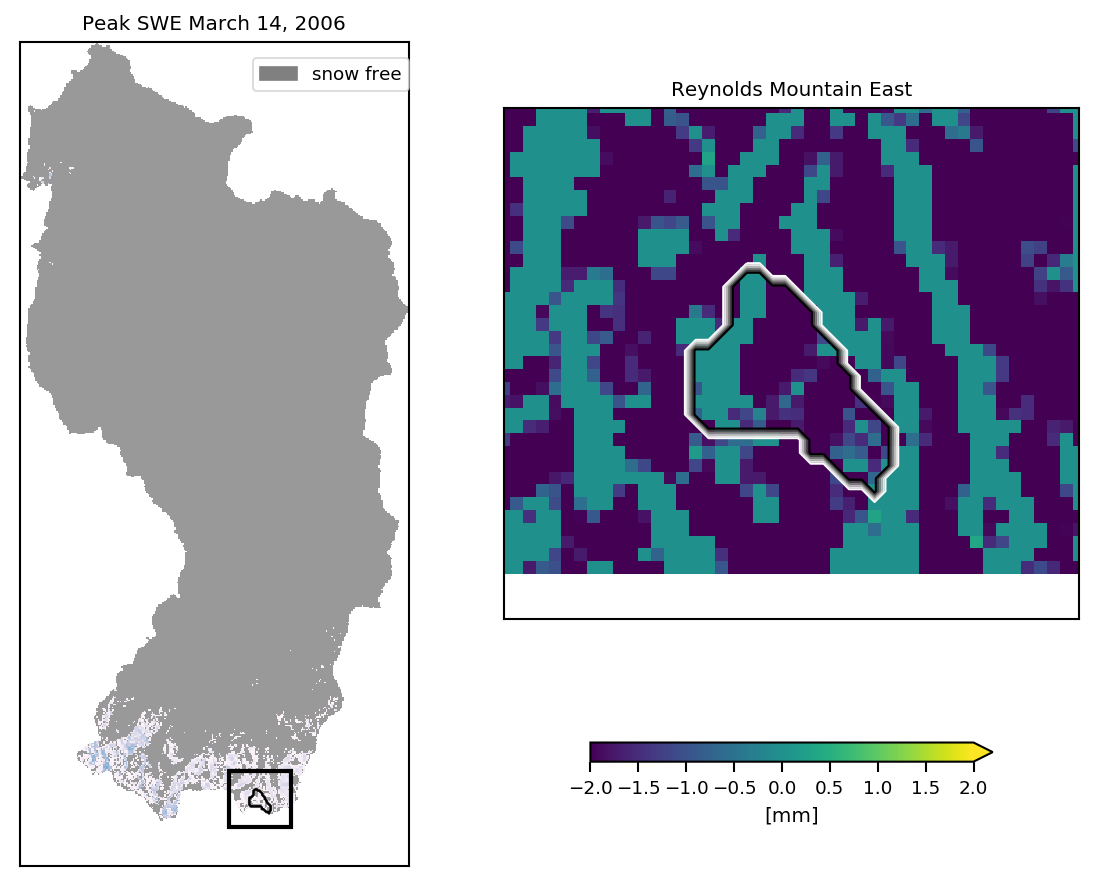

In [99]:
# mask RCEW and RME
swe[mask == 0] = np.nan

xi = [150, 195]
yi = [565, 525]
rme = swe[yi[0]:yi[1], xi[0]:xi[1]]

# create the colormap
colorsbad = plt.cm.Set1_r(np.linspace(0., 1, 1))
colors1 = plt.cm.PuBu(np.linspace(0, 1, 128))

colors = np.vstack((colorsbad, colors1))
cmap = mcolors.LinearSegmentedColormap.from_list('swe_colormap', colors)
cmap.set_bad('white',1.)

# Plot the figure
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), dpi=150, nrows = 1, ncols = 2)

# RCEW basin SWE image
vmin = 0
vmax = 100
s = ax1.imshow(swe, vmin=vmin, vmax=vmax, cmap=cmap, interpolation='none')
s.axes.get_xaxis().set_ticks([])
s.axes.get_yaxis().set_ticks([])
ax1.set_title('Peak SWE March 14, 2006')

rect = patches.Rectangle((xi[0],yi[0]),xi[1]-xi[0], yi[1]-yi[0], linewidth=2, edgecolor='k', facecolor='none')
ax1.add_patch(rect)

# RME SWE image
r = ax2.imshow(swe, vmin=vmin, vmax=vmax, cmap=cmap, interpolation='none')
# r = ax2.imshow(topo['dem'], vmin=2000, vmax=2100)
# r = ax2.imshow(h5py.File('topo/maxus.nc')['maxus'][46,:], vmin=-10, vmax=10)
r = ax2.imshow(h5py.File('topo/tbreak.nc')['tbreak'][54,:], vmin=-2, vmax=2)
r.axes.get_xaxis().set_ticks([])
r.axes.get_yaxis().set_ticks([])
ax2.set_title('Reynolds Mountain East')
ax2.set_xlim(xi)
ax2.set_ylim(yi)

# Add the colorbar
cbar = fig.colorbar(r, ax=ax2, extend='max', shrink=0.7, orientation='horizontal')
cbar.set_label('[mm]')

# RME boundary
ax1.contour(rme_mask, cmap="Greys", linewidths = 1)
ax2.contour(rme_mask, cmap="Greys", linewidths = 1)
# ax2.imshow(rme_mask)

p = [patches.Patch(color='grey', label='snow free')]
ax1.legend(handles=p, bbox_to_anchor=(0.6, 0.98),
          loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig('rcew_figure.png', dpi=200)